In [1]:
import modelling as mdl
import nn_train_eval as nn
import datetime


In [2]:
arguments = mdl.dummy_args()
arguments['export_path'] = '../ipynb_results/'


In [3]:
mdl.do_training(arguments.copy())

/Users/max/anaconda3/envs/aicore_mdl/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/max/anaconda3/envs/aicore_mdl/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/max/anaconda3/envs/aicore_mdl/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/max/anaconda3/envs/aicore_mdl/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter t

finishd tuning model: sgdregressor


/Users/max/anaconda3/envs/aicore_mdl/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/max/anaconda3/envs/aicore_mdl/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/max/anaconda3/envs/aicore_mdl/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/max/anaconda3/envs/aicore_mdl/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter t

For sgdregressor
baseline RMSE: 92.97756076885375
tuned RMSE: 91.03803204092263



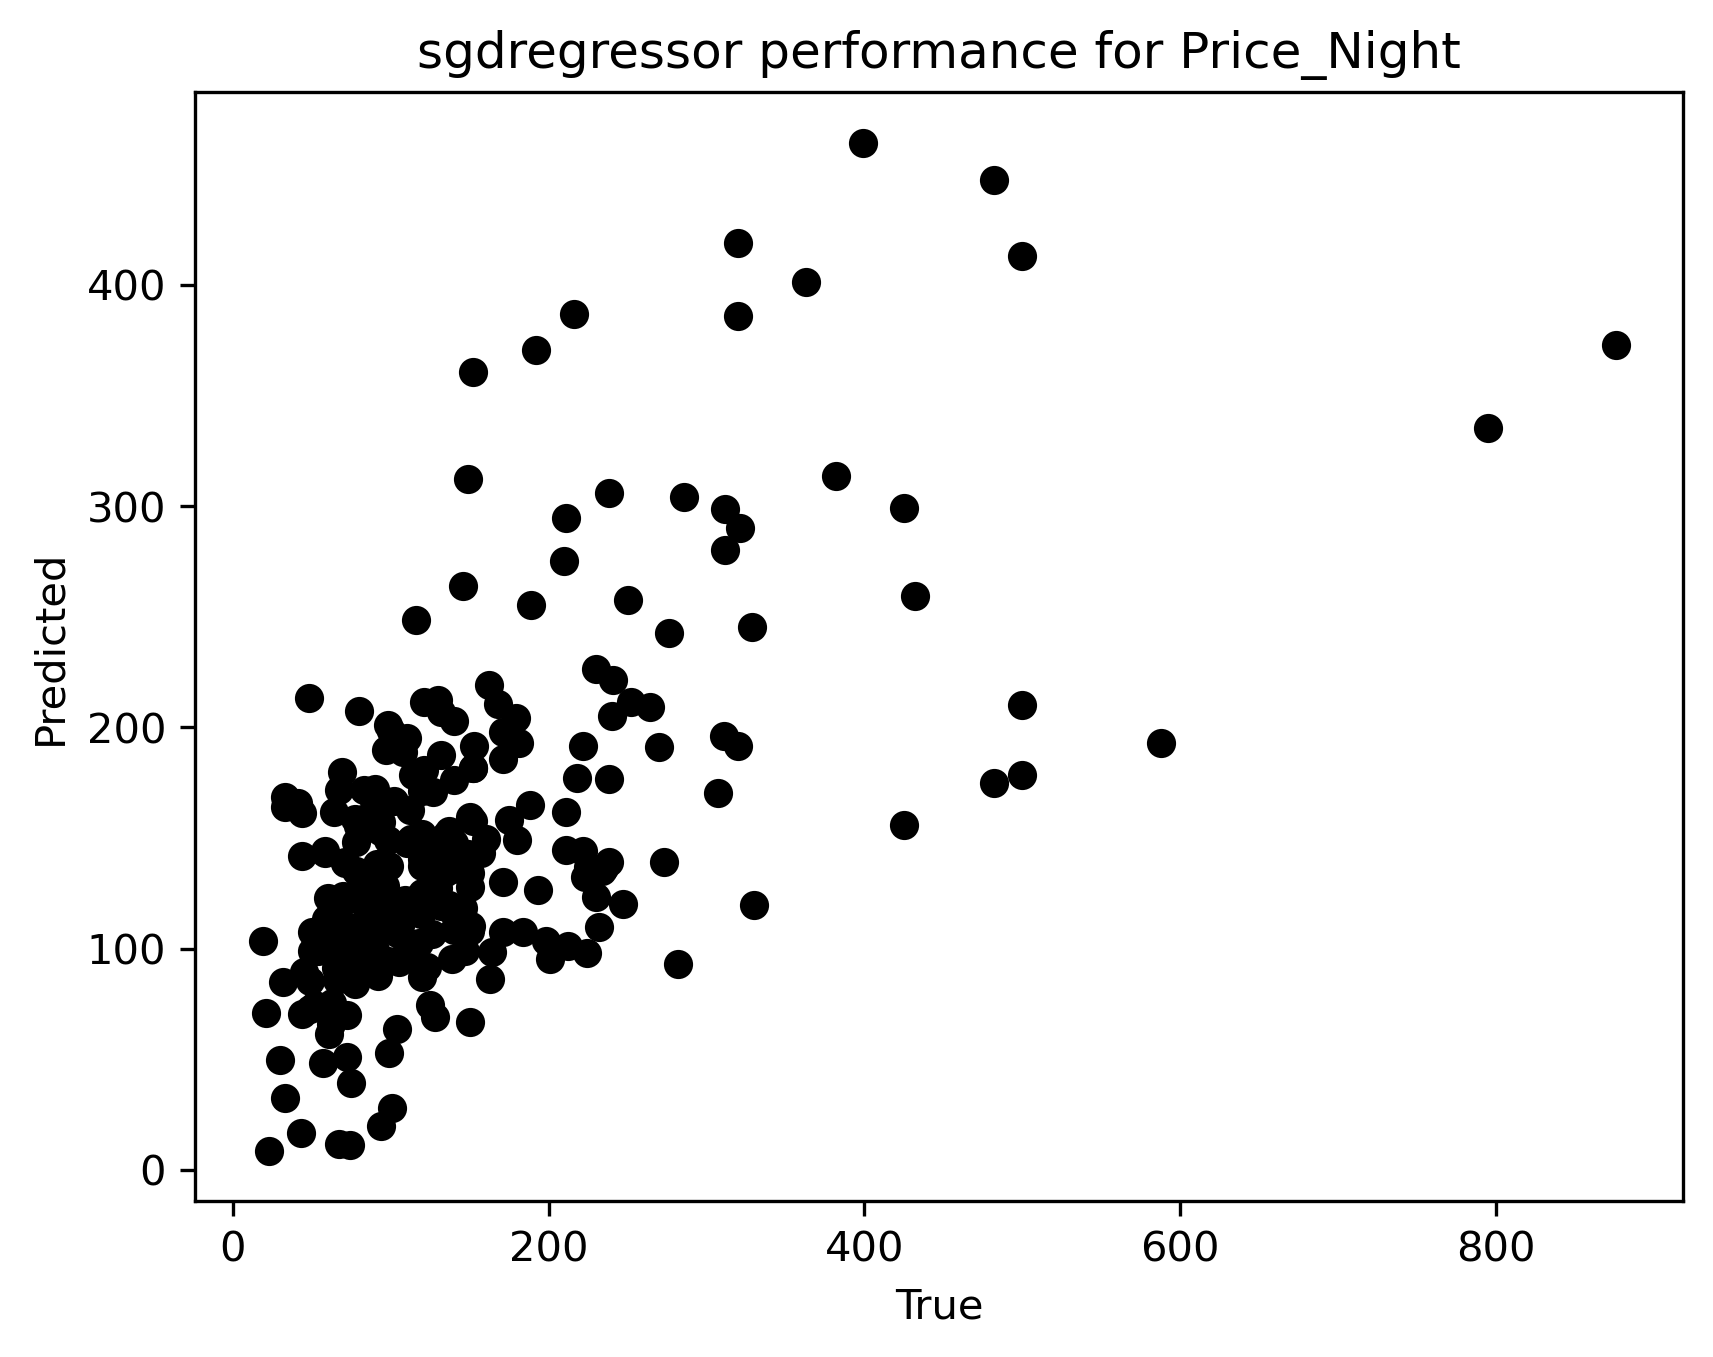

In [4]:
mdl.do_evaluation(arguments.copy())

For randomforestclassifier
baseline accuracy: 0.8353413654618473
tuned accuracy: 0.7991967871485943



<Figure size 1920x1440 with 0 Axes>

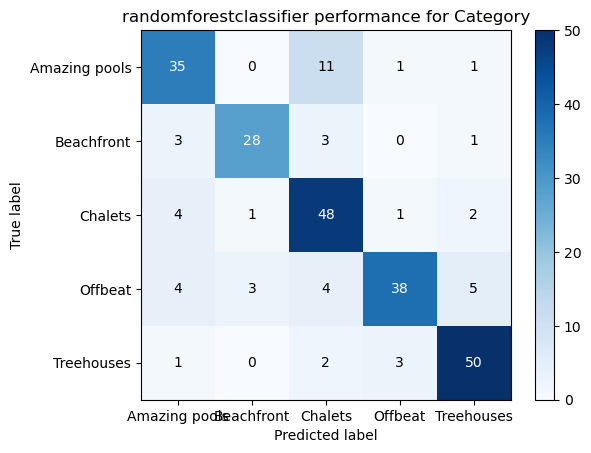

In [5]:
arguments = mdl.dummy_args()
arguments['ml_model'] = ['randomforestclassifier']
arguments['label'] = 'Category'
mdl.do_evaluation(arguments.copy())



We can now loop through all the models we trained to find one that performs best. For predicting the price:


For sgdregressor
baseline RMSE: 93.02808587455264
tuned RMSE: 92.24155147555369

For decisiontreeregressor
baseline RMSE: 55.03859543948962
tuned RMSE: 83.69928395438379

For randomforestregressor
baseline RMSE: 53.69917549828047
tuned RMSE: 82.08909138120366

For gradientboostingregressor
baseline RMSE: 65.81869832882683
tuned RMSE: 78.58595382327053

For svr
baseline RMSE: 115.0312241097637
tuned RMSE: 95.85161205461618

For kernelridge
baseline RMSE: 178.5404102639561
tuned RMSE: 88.20702523494488

For bayesianridge
baseline RMSE: 91.24909041623063
tuned RMSE: 91.23947573644439



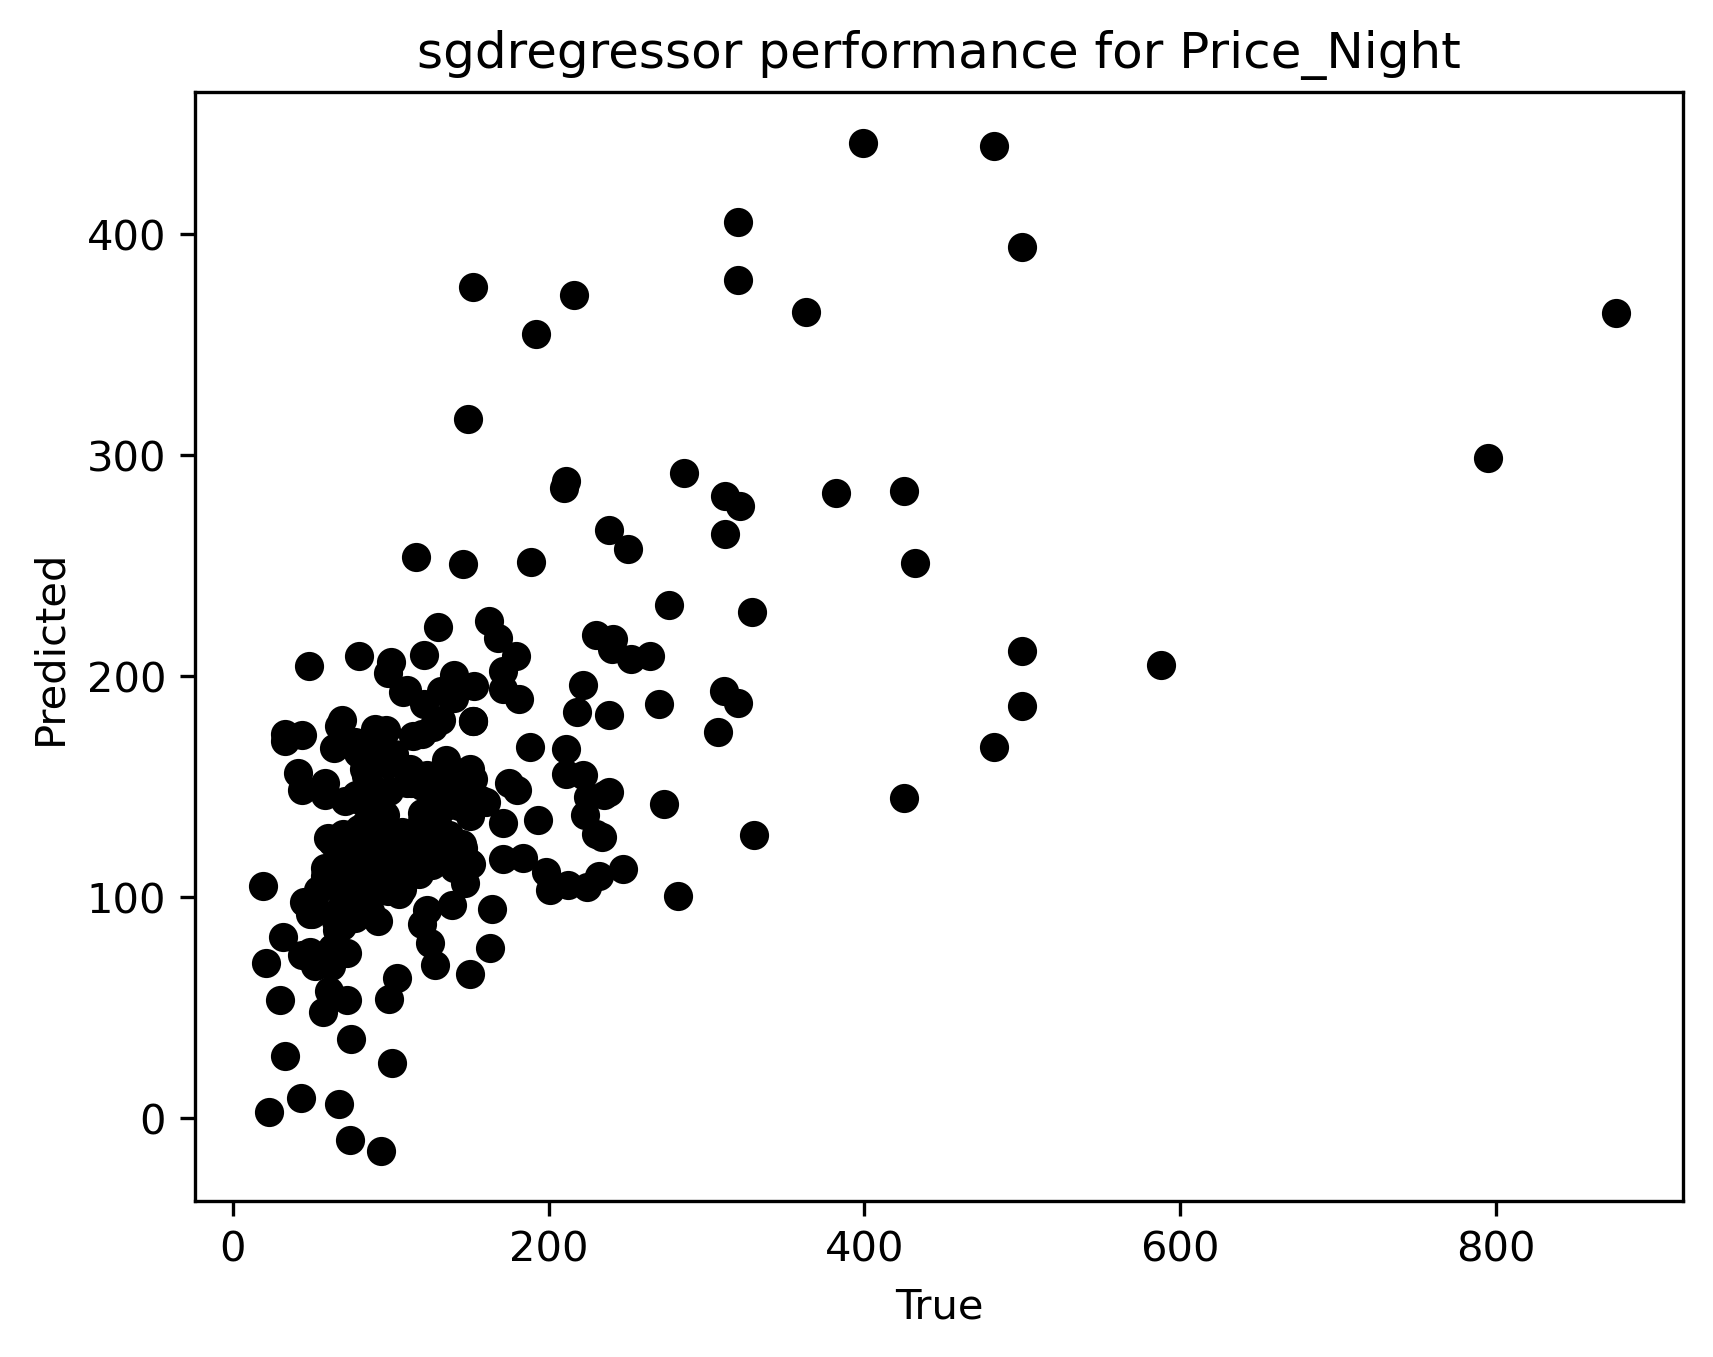

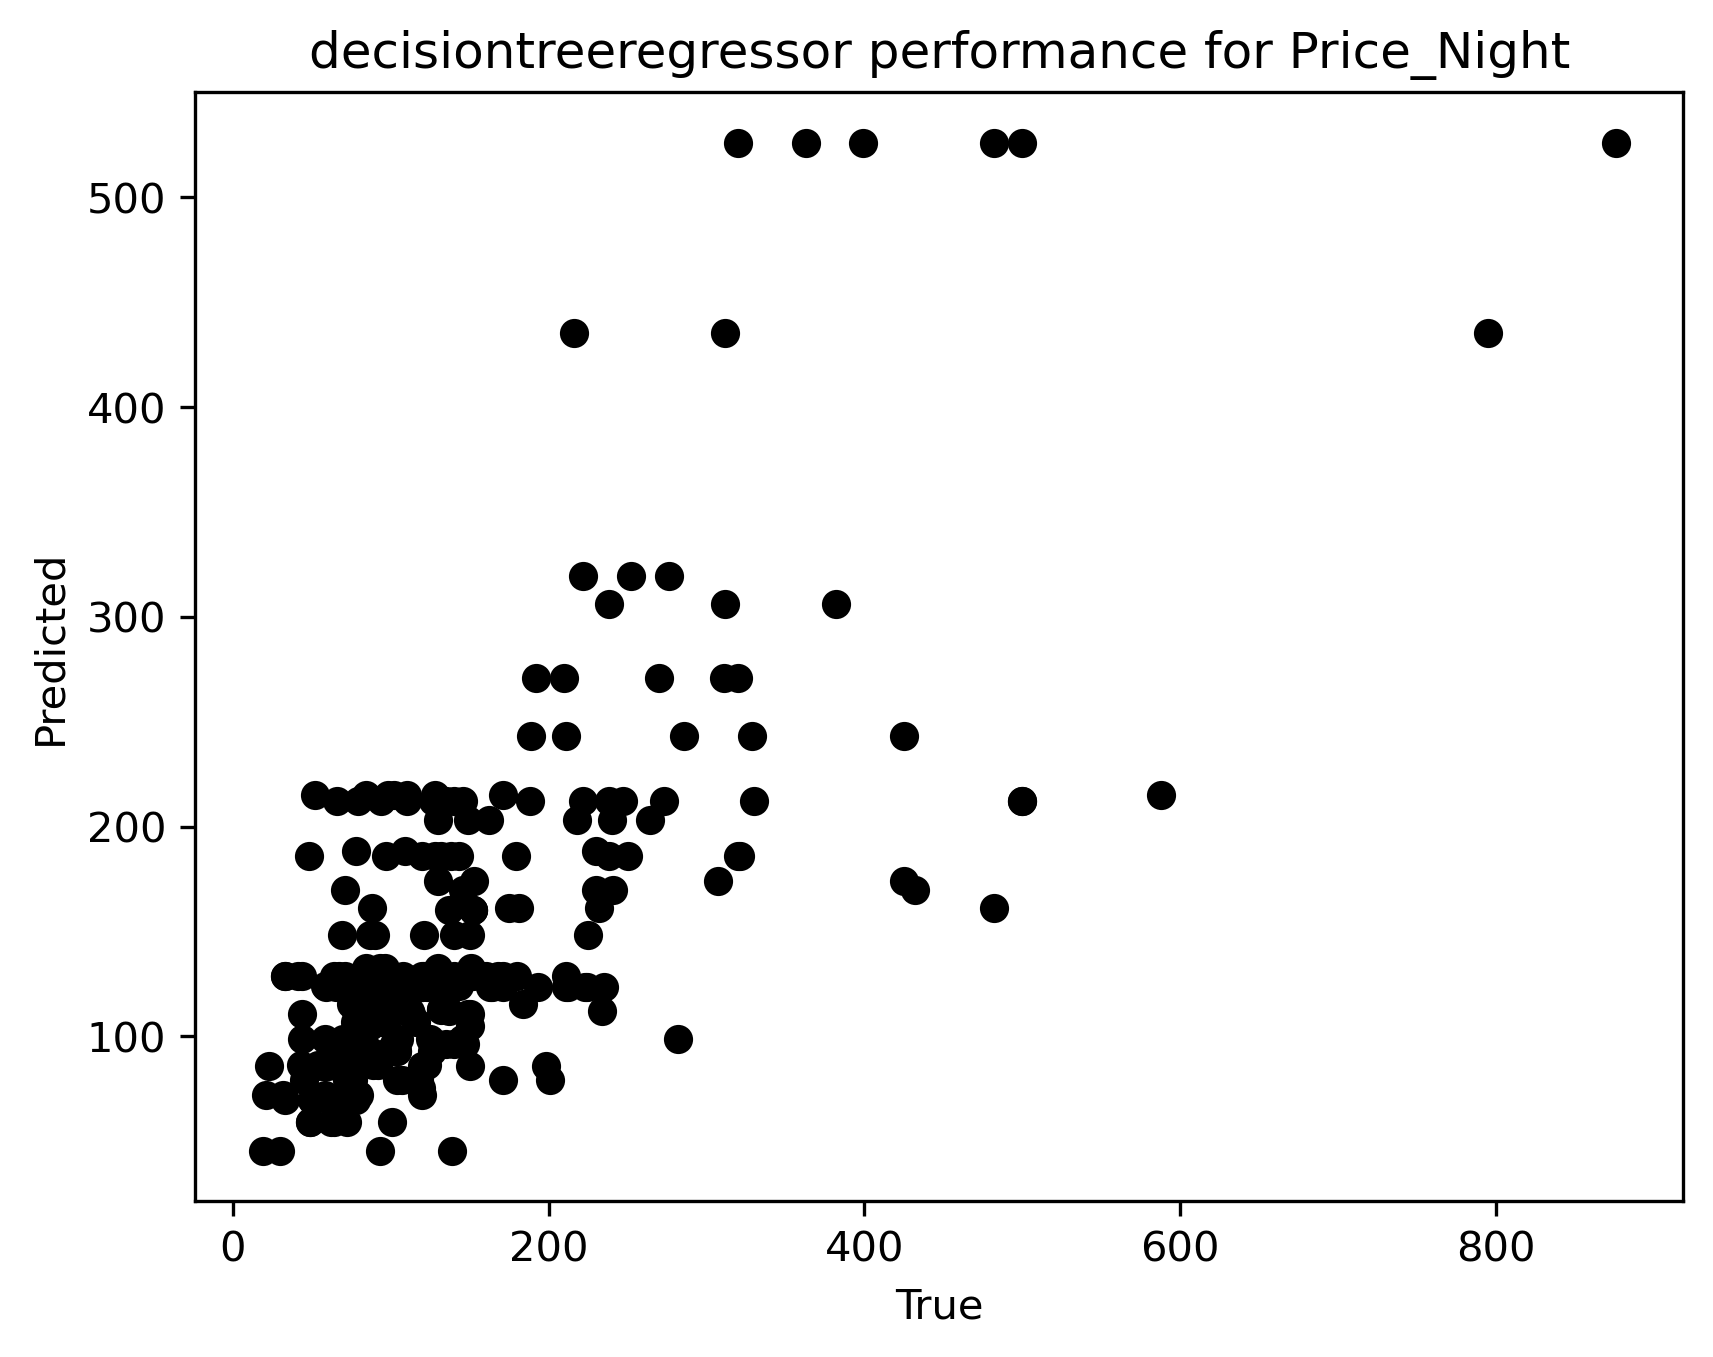

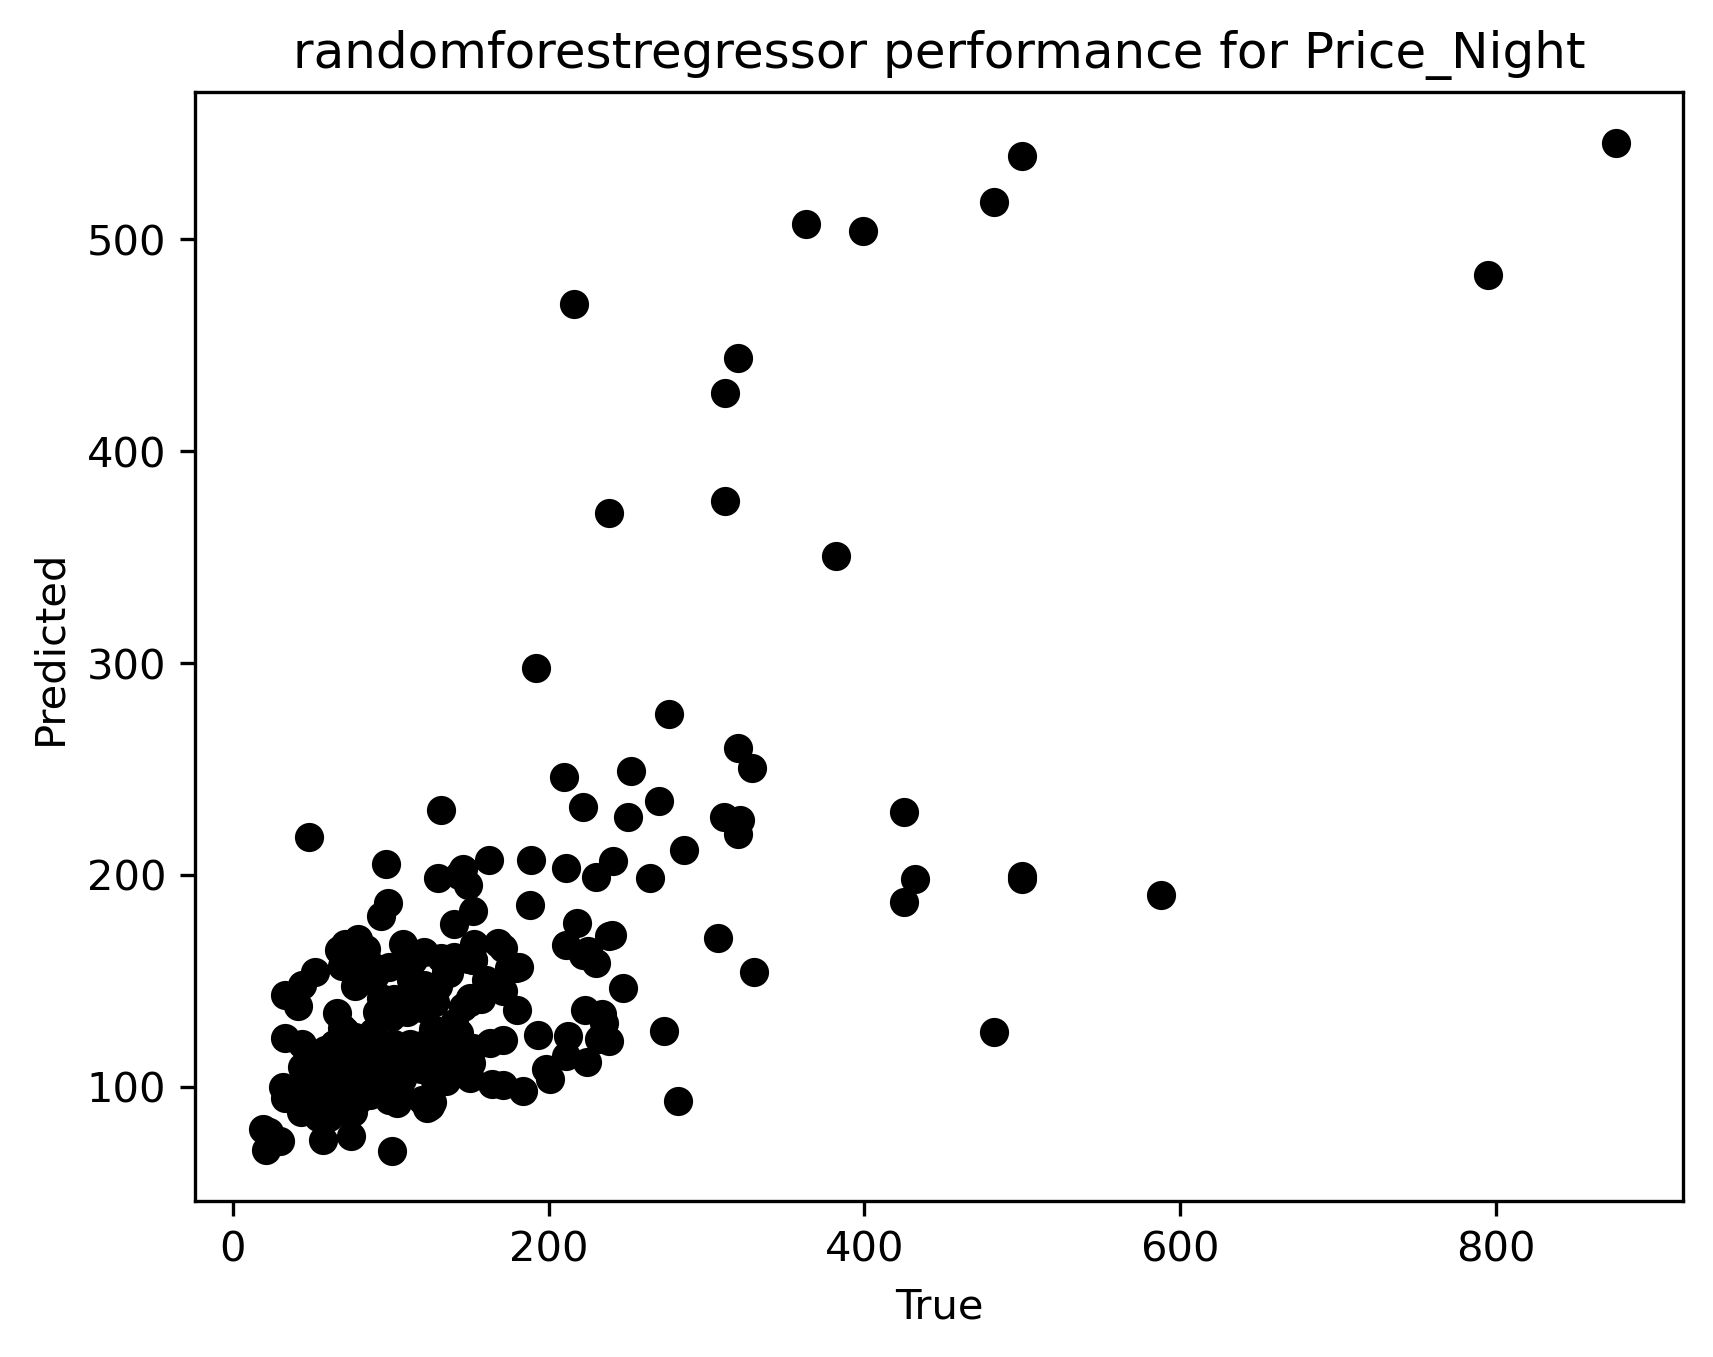

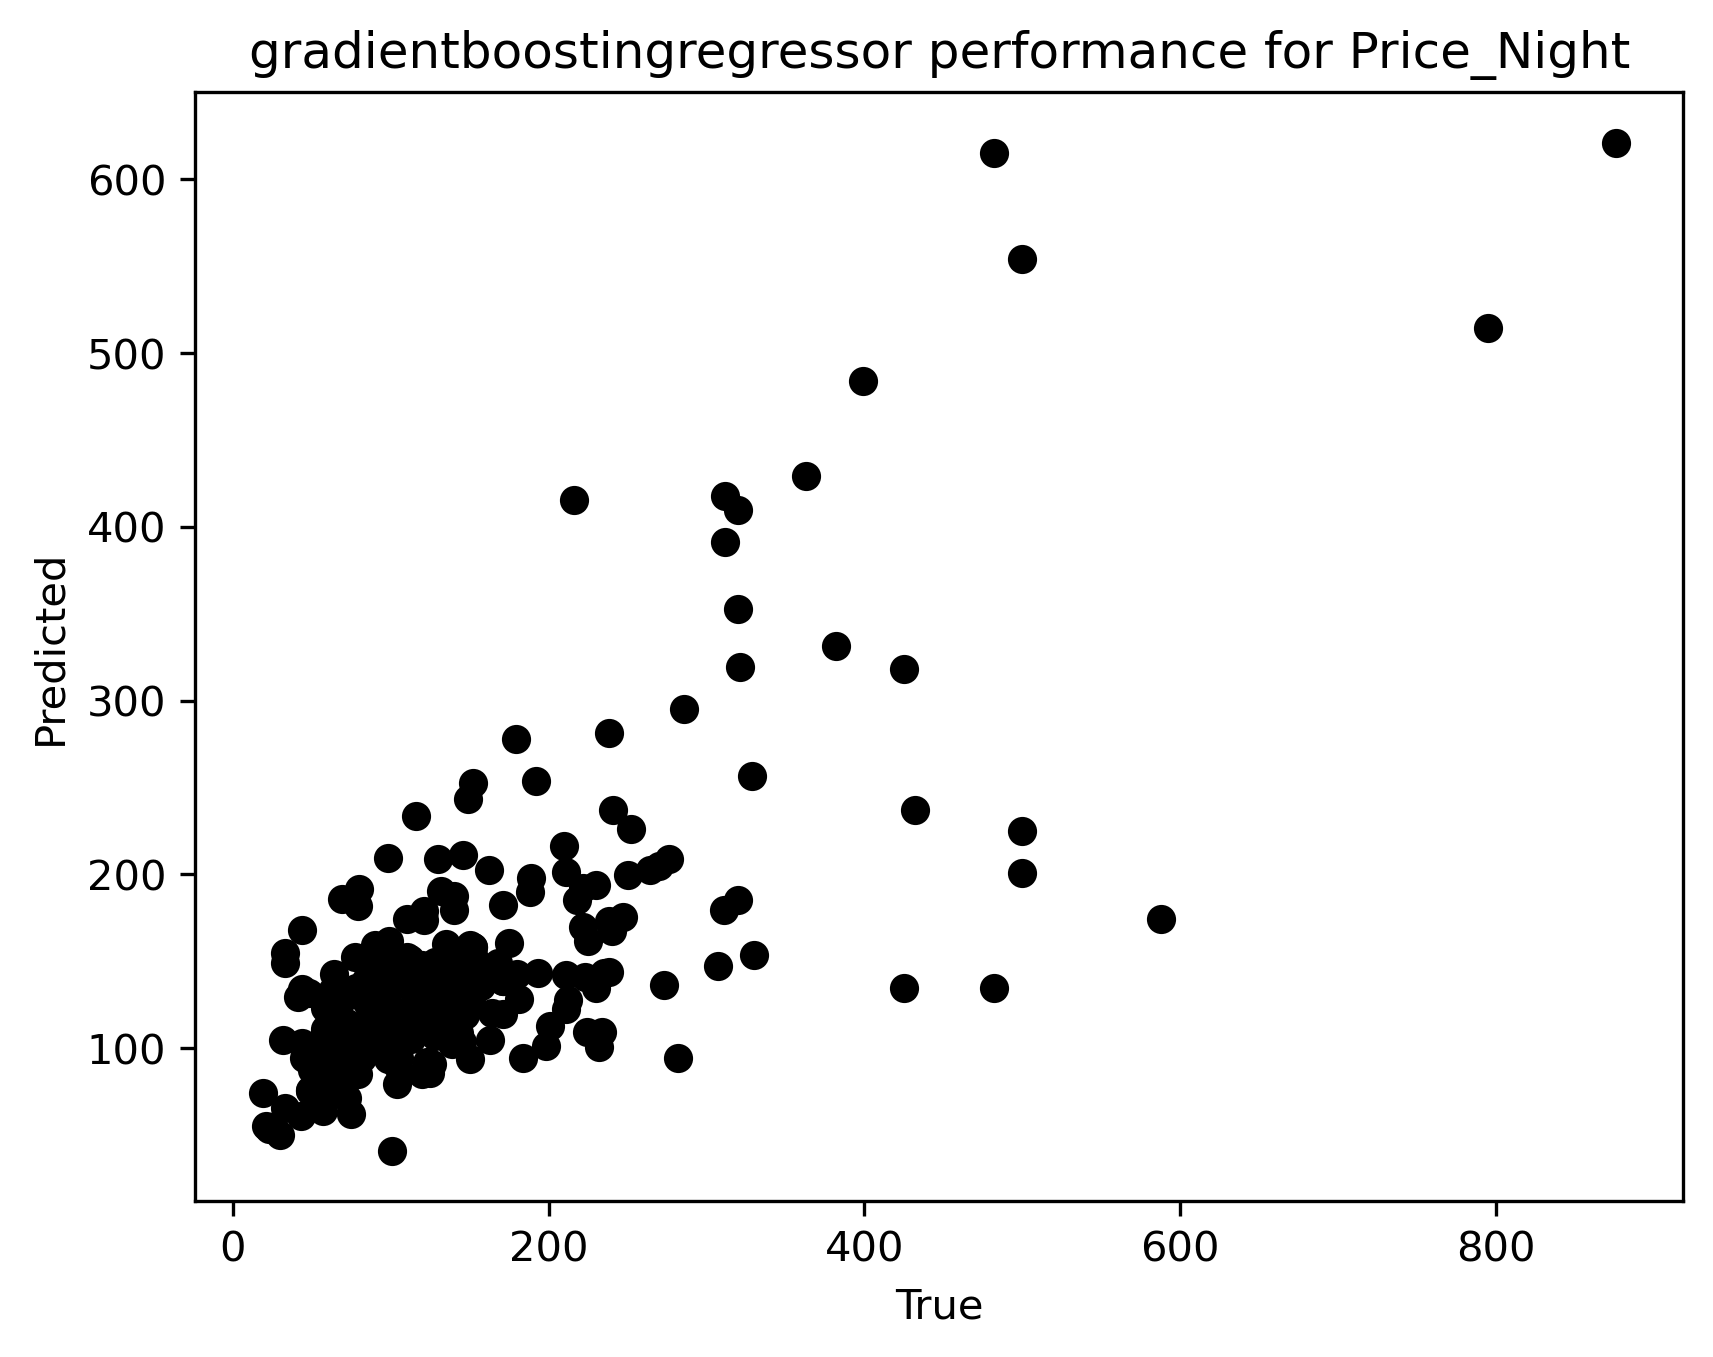

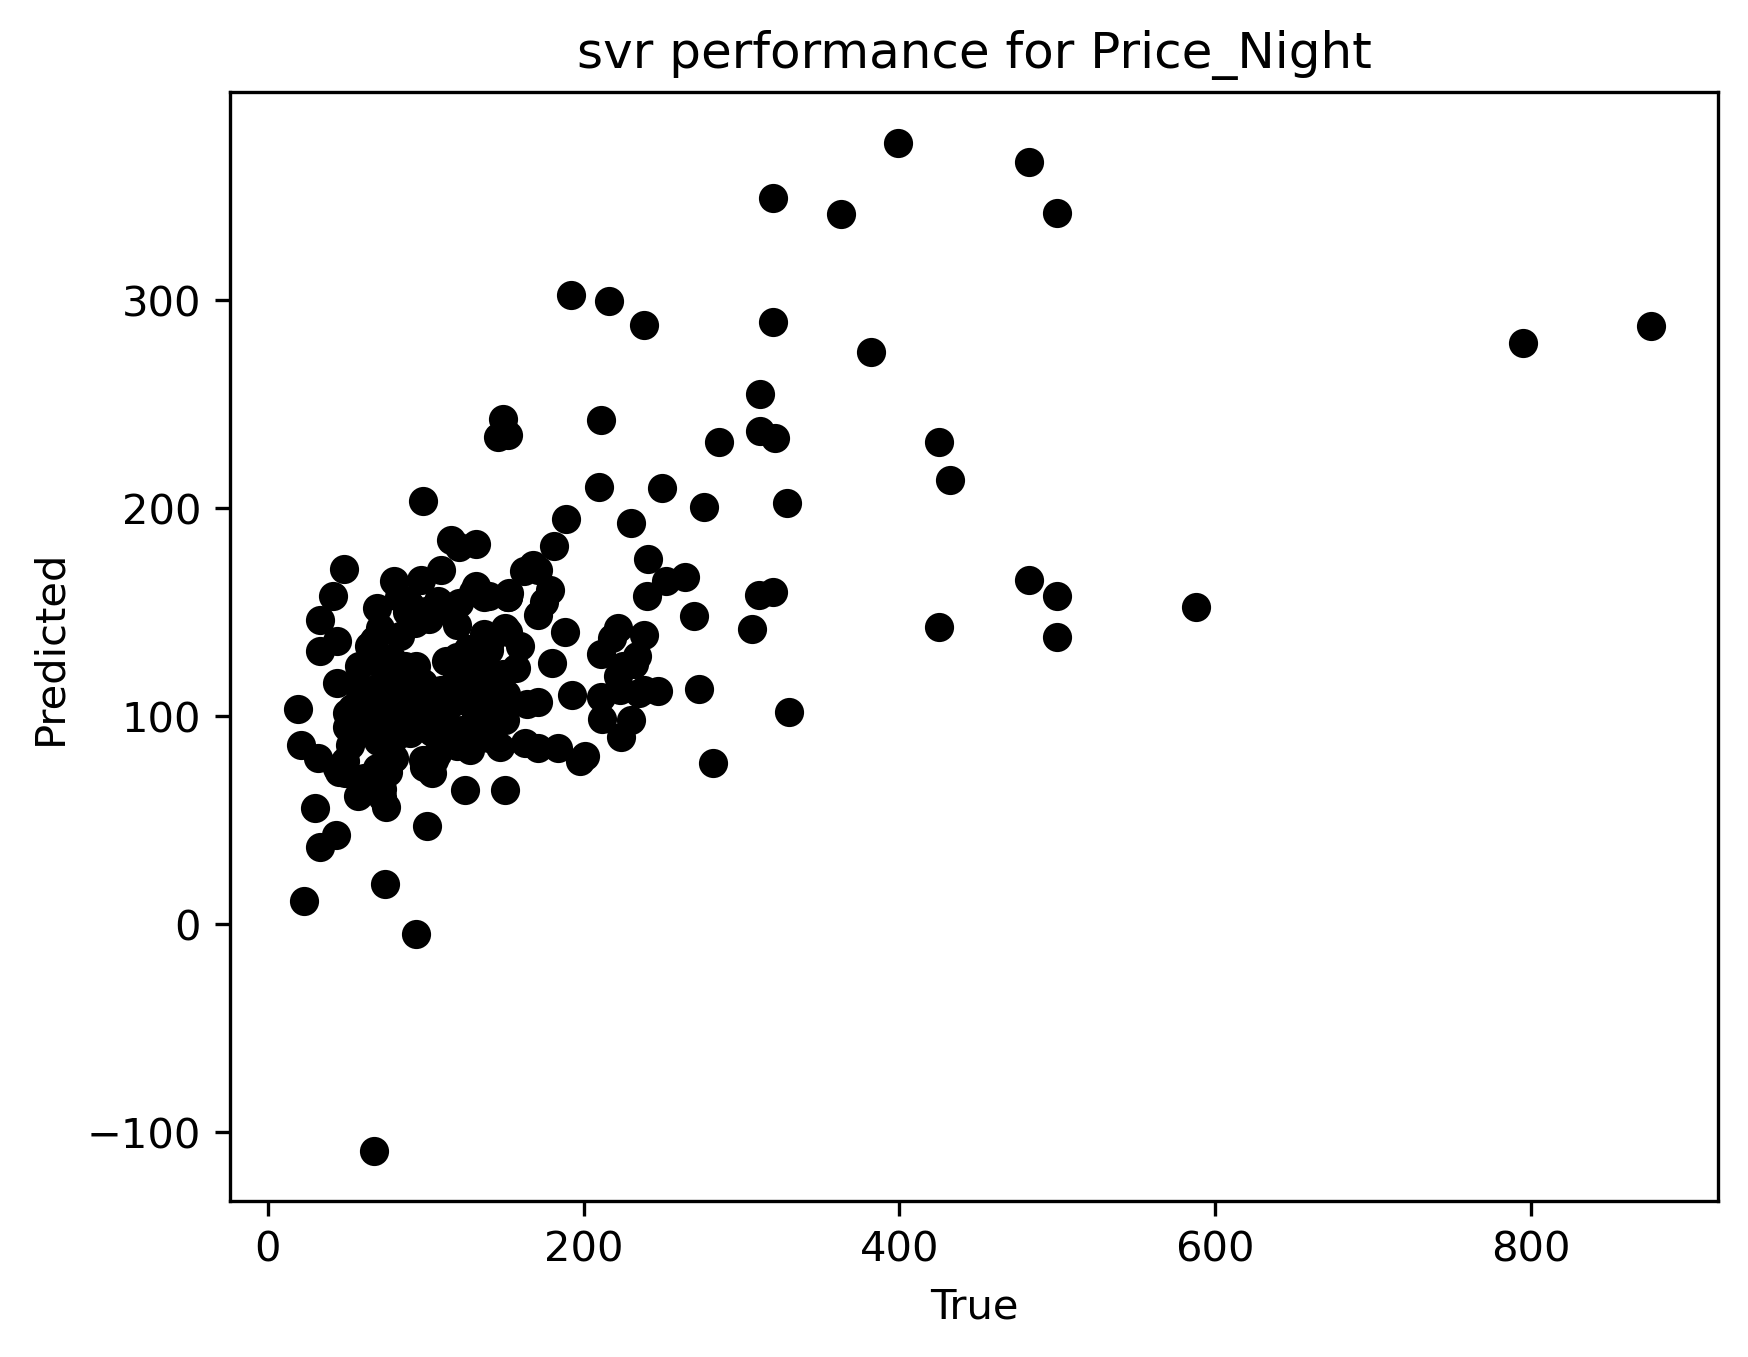

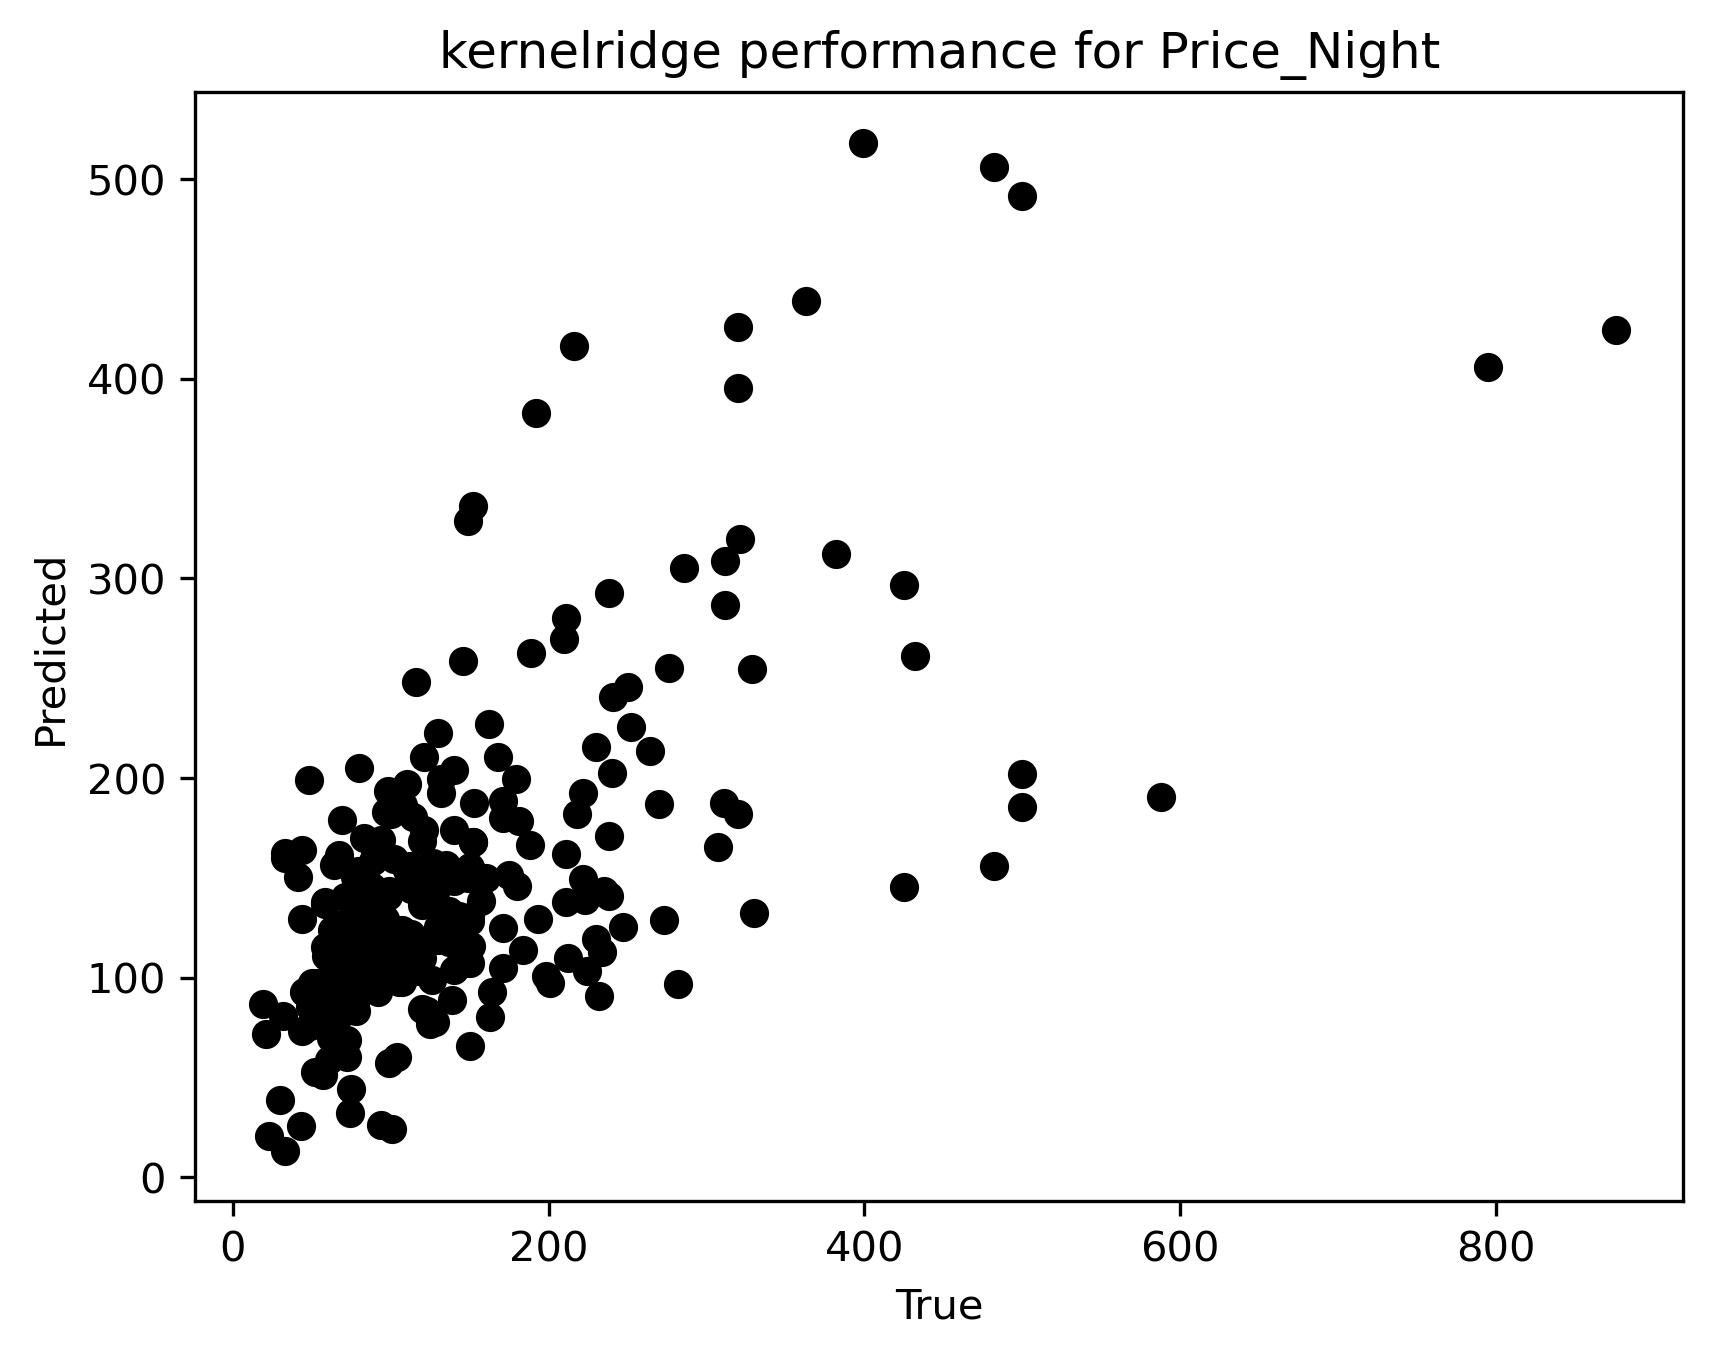

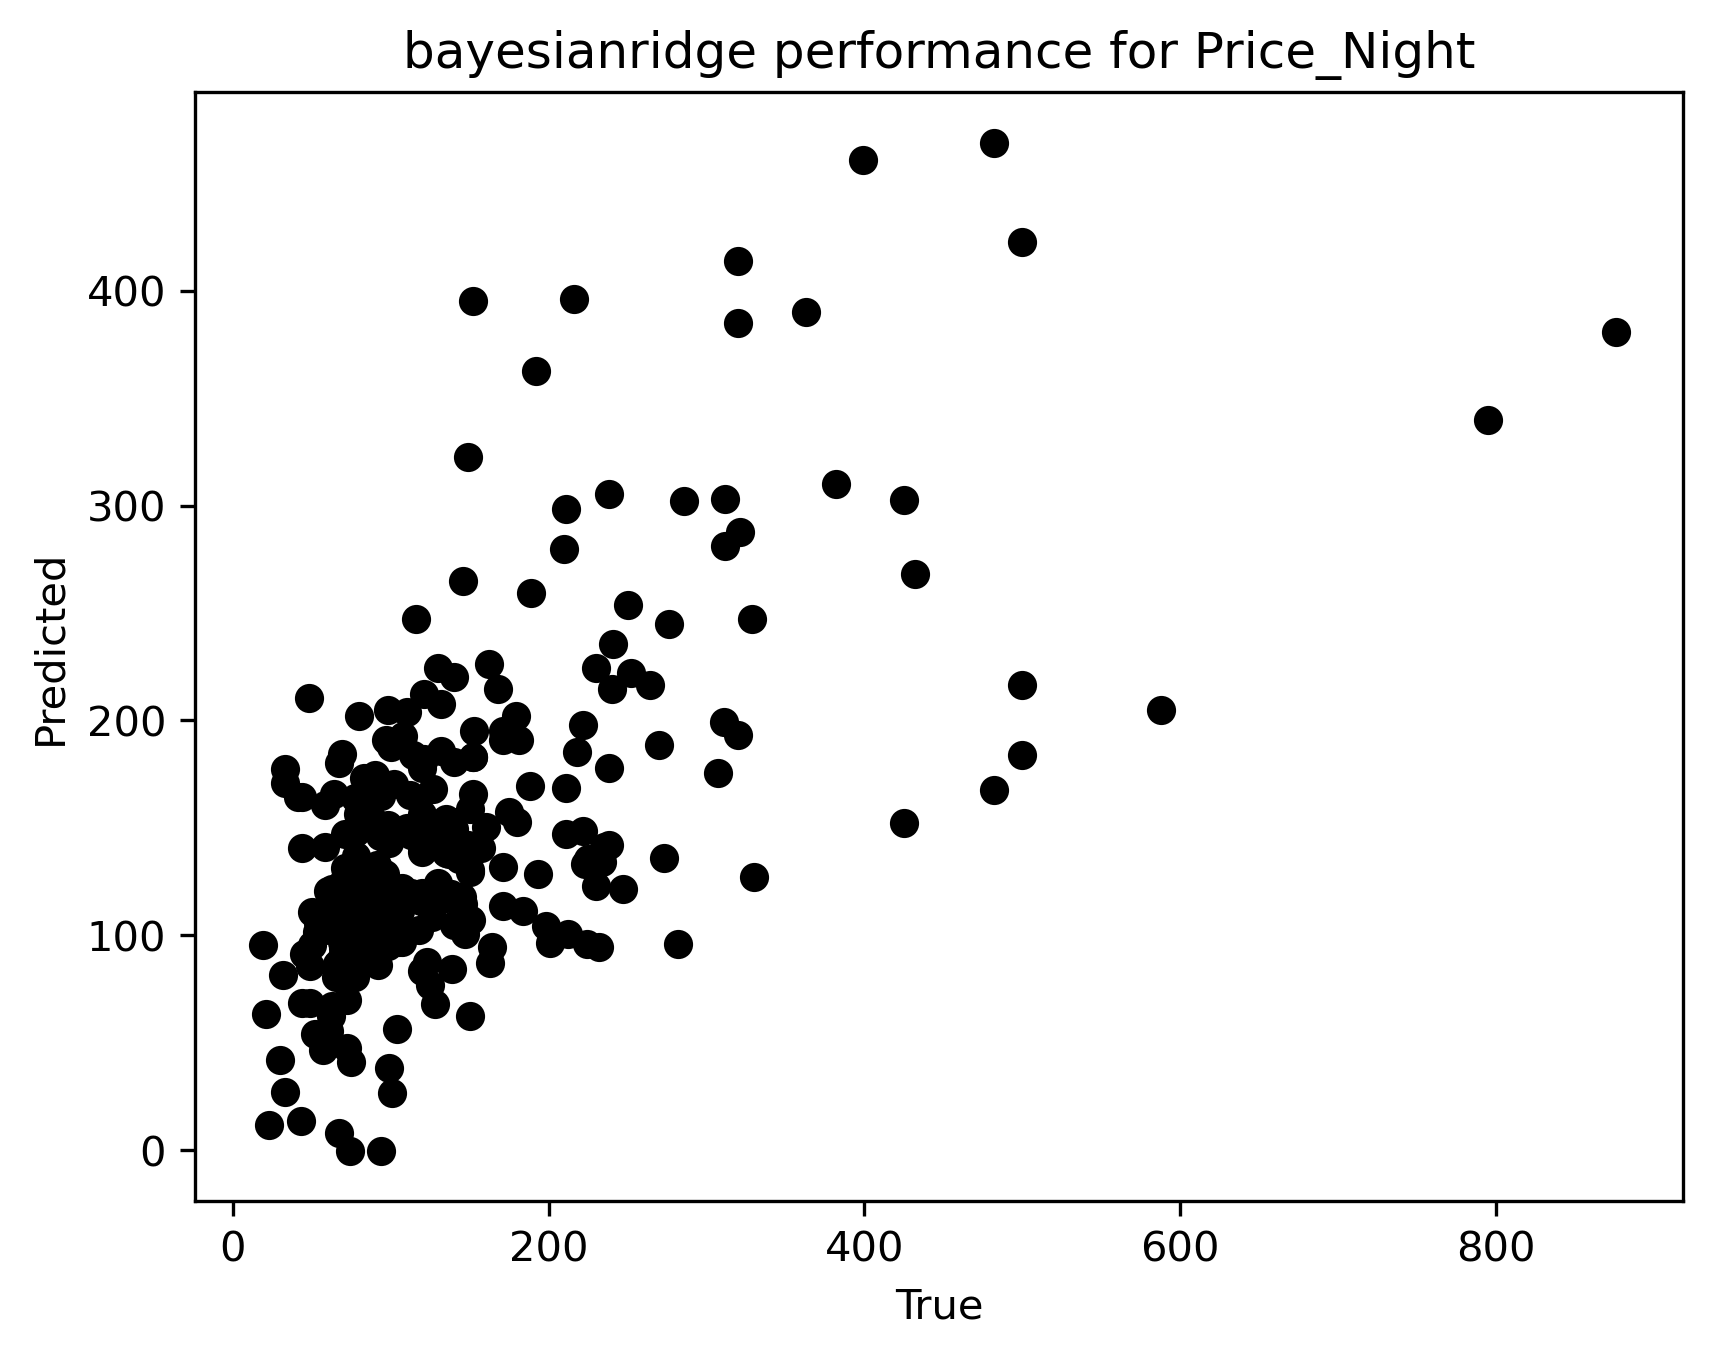

In [6]:
arguments = mdl.dummy_args()
arguments['ml_model'] = ['sgdregressor','decisiontreeregressor','randomforestregressor','gradientboostingregressor','svr','kernelridge','bayesianridge']
for model in arguments['ml_model']:
    arguments['ml_model'] = [model]
    mdl.do_evaluation(arguments.copy())

We also have the neural network for predicting the price. Here, we train the model and identify the best performing configuration. The full taining isn't repeated, instead we train 16 models to show the process.

/Users/max/Documents/aicore/projects/price_modelling/code/nn_train_eval.py:200: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (torch.tensor(self.X.iloc[index], dtype=torch.float32),
/Users/max/Documents/aicore/projects/price_modelling/code/nn_train_eval.py:200: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (torch.tensor(self.X.iloc[index], dtype=torch.float32),
/Users/max/Documents/aicore/projects/price_modelling/code/nn_train_eval.py:200: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFr

Best RMSE: 93.38025665283203
Best config: 14
Best results at: ../models/Price_Night/nn/2024-02-22_11-52-34/14/


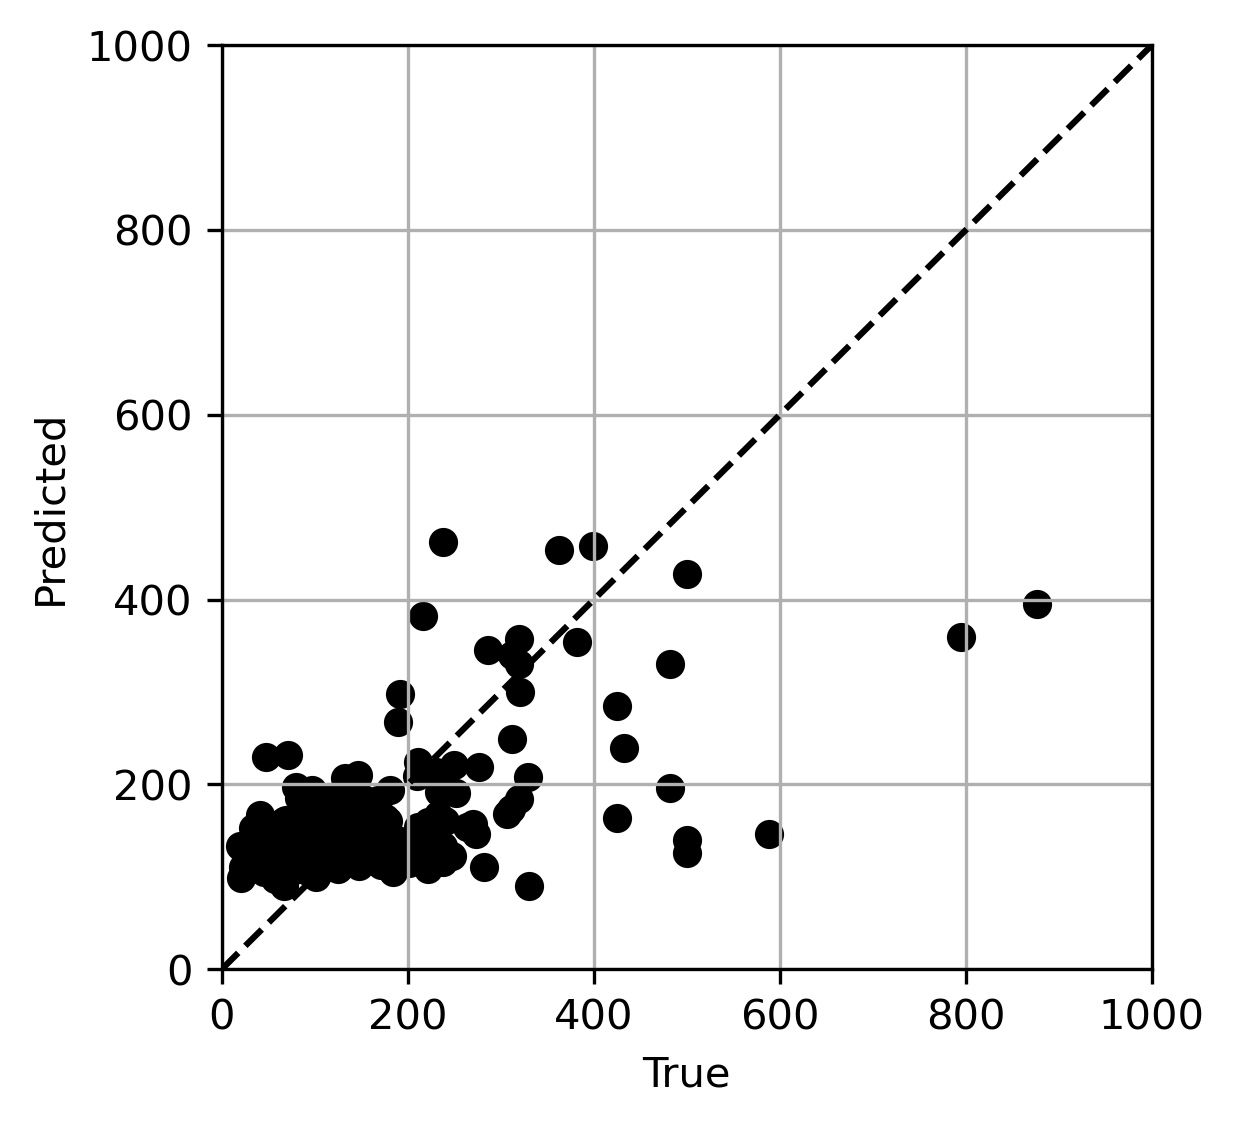

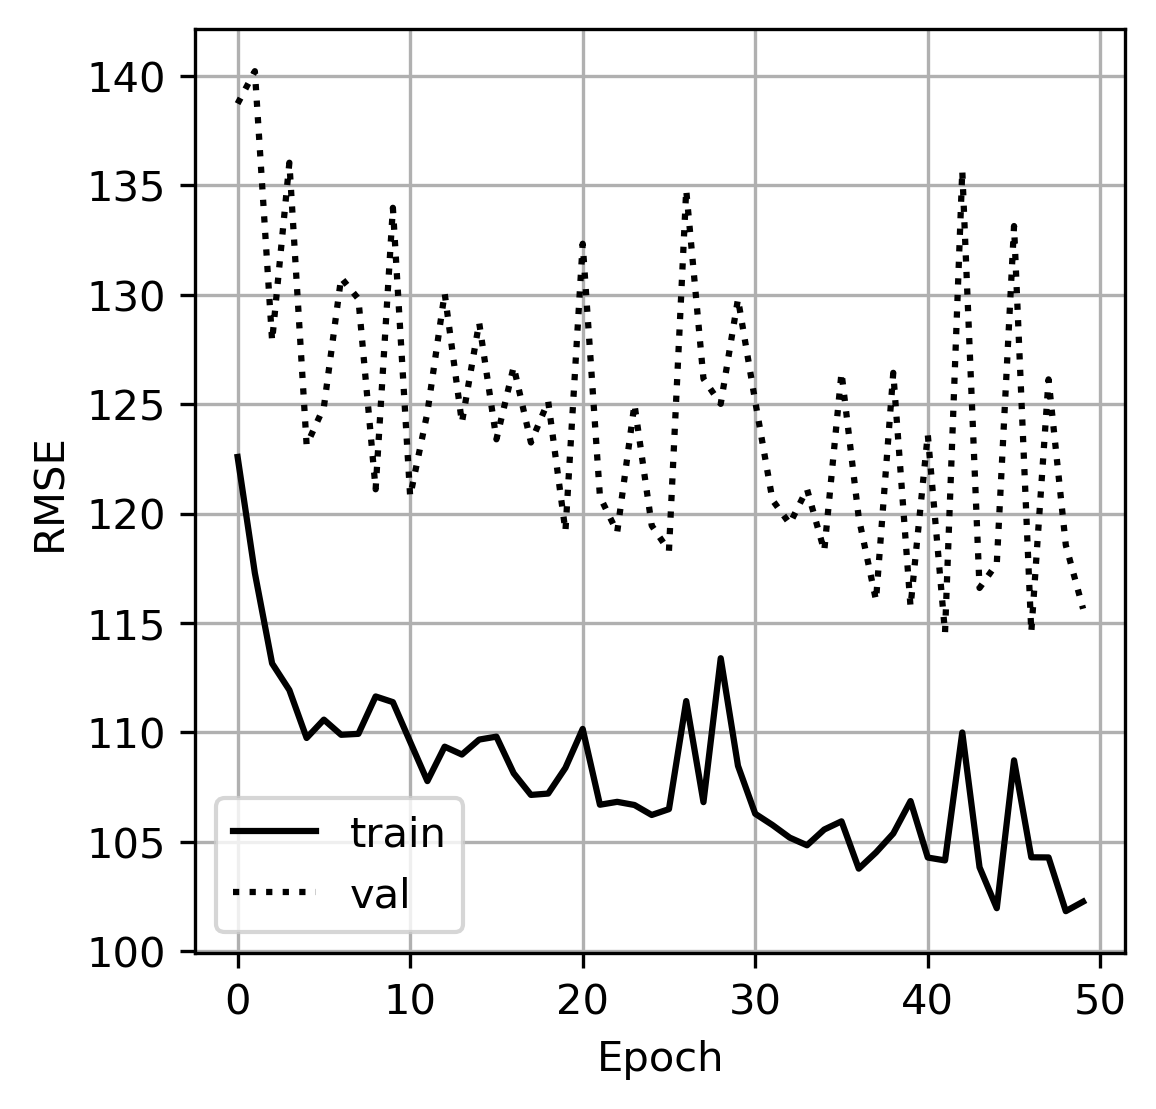

In [7]:
results_dir, trained = nn.train_nn(arguments)

best_rmse, best_config = nn.find_best_model(results_dir, range(arguments['nn_n_configs']))

nn.evaluate_nn(best_config, results_dir, plot_scatter=True, plot_loss=True)

print('Best RMSE:', best_rmse)
print('Best config:', best_config)
print('Best results at:', results_dir + best_config + '/')


The best performing model produces these metrics:

We can also loop through all the models for predicting the category:

For logisticregression
baseline accuracy: 0.42168674698795183
tuned accuracy: 0.42168674698795183

For decisiontreeclassifier
baseline accuracy: 0.8353413654618473
tuned accuracy: 0.5220883534136547

For randomforestclassifier
baseline accuracy: 0.8353413654618473
tuned accuracy: 0.7991967871485943

For gradientboostingclassifier
baseline accuracy: 0.7068273092369478
tuned accuracy: 0.6506024096385542



<Figure size 1920x1440 with 0 Axes>

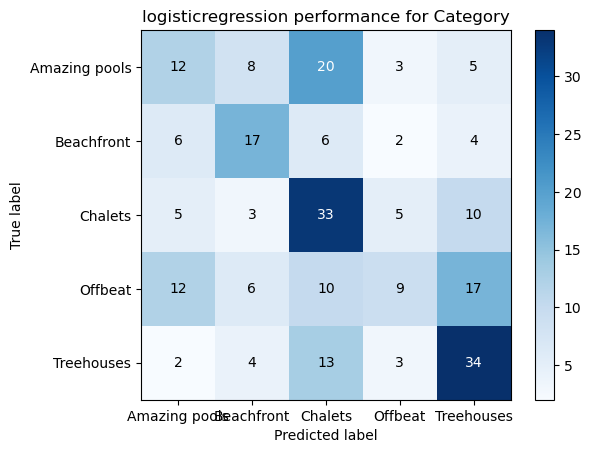

<Figure size 1920x1440 with 0 Axes>

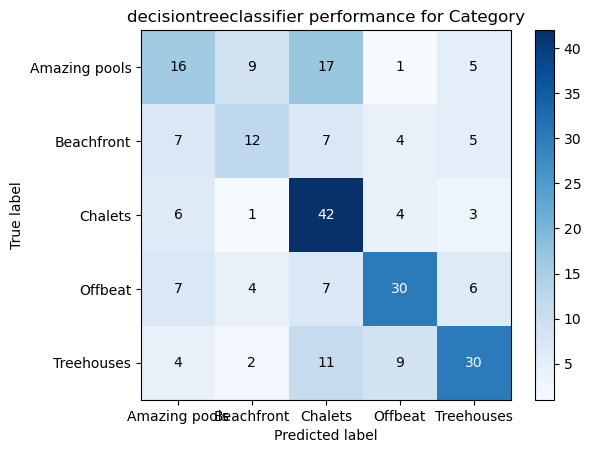

<Figure size 1920x1440 with 0 Axes>

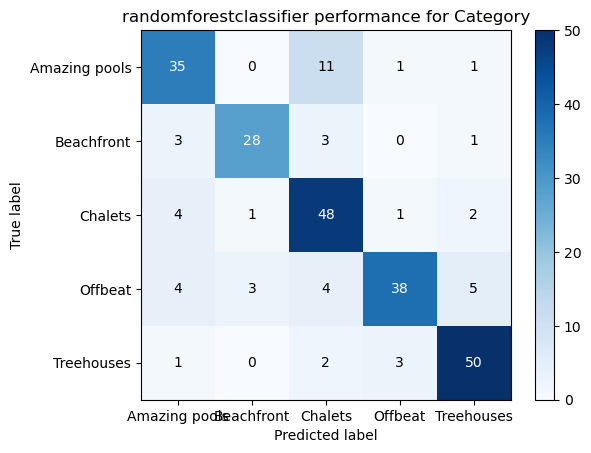

<Figure size 1920x1440 with 0 Axes>

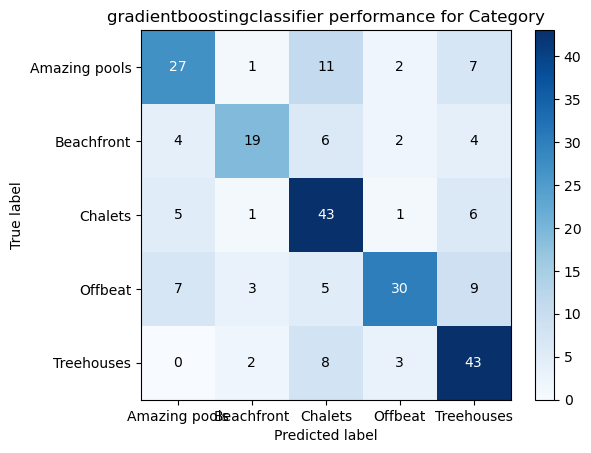

In [9]:
arguments = mdl.dummy_args()
arguments['ml_model'] = ['logisticregression','decisiontreeclassifier','randomforestclassifier','gradientboostingclassifier']
arguments['label'] = 'Category'
for model in arguments['ml_model']:
    arguments['ml_model'] = [model]
    mdl.do_evaluation(arguments.copy())

Finally, we can turn the model to another use case by passing a new variable at the command line. We simulate that here by adjusting the arguments.

In [11]:
arguments = mdl.dummy_args()
arguments['label'] = 'bedrooms'
arguments['ml_model'] = ['randomforestclassifier']
mdl.do_training(arguments.copy())
mdl.do_evaluation(arguments.copy())


{'randomforestclassifier__n_estimators': [10, 50, 100, 200, 350, 500, 1000], 'randomforestclassifier__max_depth': [None, 2, 3, 4, 6, 8, 10], 'randomforestclassifier__min_samples_split': [2, 6, 10], 'randomforestclassifier__min_samples_leaf': [1, 5, 9], 'randomforestclassifier__min_impurity_decrease': [0.0, 0.25, 0.5]}


/Users/max/anaconda3/envs/aicore_mdl/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


And we can loop through all the pre-trained models for predicting bedrooms.

In [ ]:
arguments = mdl.dummy_args()
arguments['label'] = ['bedrooms']
arguments['ml_model'] = ['logisticregression','decisiontreeclassifier','randomforestclassifier','gradientboostingclassifier']
for model in arguments['ml_model']:
    arguments['ml_model'] = [model]
    mdl.do_evaluation(arguments.copy())

In [ ]:
arguments